<a href="https://colab.research.google.com/github/Juliaocmc/imersao_dados_alura/blob/main/imersao_dados_alura_aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios Aula 03


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Desafio 01: Criar tabelas de frequência com pandas.groupby()


In [39]:
dados.groupby(by = ['dose','tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

In [48]:

dados.groupby(['tempo'])['dose'].value_counts()

tempo  dose
24     D1      3886
       D2      3886
48     D1      4354
       D2      3896
72     D1      3907
       D2      3885
Name: dose, dtype: int64

###Desafio 02: Normalizar o crosstab pela coluna.



In [52]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')*100

tratamento  com_controle  com_droga
dose tempo                         
D1   24        16.130761  16.334062
     48        18.381565  18.275014
     72        16.452304  16.402406
D2   24        16.345123  16.315837
     48        16.345123  16.361400
     72        16.345123  16.311281

###Desafio 03: Explorar outros agregadores.



In [64]:
pd.pivot_table(dados, columns='tratamento', index=['dose', 'tempo'], values=['c-0', 'c-1'], aggfunc=np.mean)

c-0                    c-1          
tratamento com_controle com_droga com_controle com_droga
dose tempo                                              
D1   24        0.139234 -0.207450     0.433688 -0.395548
     48        0.179384 -0.454262     0.254034 -0.575214
     72        0.169599 -0.667808     0.175468 -0.763796
D2   24        0.041709 -0.153920     0.110259 -0.312657
     48        0.139303 -0.390712     0.168863 -0.464439
     72        0.091155 -0.495003     0.019089 -0.543045

###Desafio 04: Explorar o melt.

***Ao meu entender, o melt é utilizado para criar tabelas destacanto um tipo de variavel***

In [69]:
pd.melt(dados, id_vars=["dose"], value_vars=["tempo", "tratamento"])


,dose,variable,value
0,D1,tempo,24
1,D1,tempo,72
2,D1,tempo,48
3,D1,tempo,48
4,D2,tempo,72
...,...,...,...
47623,D2,tratamento,com_droga
47624,D2,tratamento,com_droga
47625,D2,tratamento,com_controle
47626,D1,tratamento,com_droga


In [70]:
pd.melt(dados, id_vars=["dose", "tempo"], value_vars=["c-1"])

,dose,tempo,variable,value
0,D1,24,c-1,0.1083
1,D1,72,c-1,0.2723
2,D1,48,c-1,-1.4640
3,D1,48,c-1,-4.5520
4,D2,72,c-1,0.7364
...,...,...,...,...
23809,D2,24,c-1,0.1871
23810,D2,24,c-1,0.4350
23811,D2,48,c-1,0.6329
23812,D1,24,c-1,1.3240


###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 



In [117]:
g = pd.DataFrame(dados[dados['dose'] == 'D1'].loc[:,'g-0':'g-50'])
c = pd.DataFrame(dados[dados['dose'] == 'D1'].loc[:,'c-0':'c-50'])
g_c = pd.concat([g, c], axis =1, join = 'inner')
g_c = g_c.corr()
g_c_corr = g_c.loc['c-0':'c-50','g-0':'g-50']
g_c_corr

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
c-0,-0.623017,0.088438,-0.120350,0.026657,-0.342211,0.249706,-0.160182,0.542364,0.609272,0.483679,0.630494,-0.230474,0.420479,-0.526453,0.469443,0.095657,0.611331,0.571865,0.112343,0.215256,0.451062,0.185878,0.169514,0.280126,0.321981,0.298076,0.538357,-0.205470,0.556170,0.207826,0.645170,-0.749442,0.320112,-0.238529,0.299438,-0.208465,0.147457,0.666253,-0.780100,-0.558607,0.723329,0.659349,0.439796,0.086524,-0.247655,0.262789,-0.662455,0.164222,-0.091325,-0.524907,0.627665
c-1,-0.634405,0.080976,-0.132486,-0.014924,-0.330921,0.240248,-0.121942,0.619943,0.592669,0.526990,0.685876,-0.238853,0.459162,-0.557750,0.495893,0.114241,0.609376,0.559550,0.074919,0.170210,0.388725,0.218613,0.158981,0.280825,0.348041,0.281924,0.556427,-0.204558,0.578644,0.237758,0.701158,-0.744541,0.381026,-0.174239,0.256341,-0.147506,0.272920,0.739665,-0.821935,-0.572998,0.687504,0.595437,0.386515,0.126404,-0.223848,0.225266,-0.659655,0.144862,-0.168464,-0.455220,0.716400
c-2,-0.647538,0.075728,-0.127077,-0.006954,-0.344541,0.253822,-0.117460,0.630551,0.587203,0.543295,0.687049,-0.243346,0.457262,-0.566173,0.497628,0.130532,0.632483,0.571614,0.091147,0.184714,0.435836,0.206761,0.140429,0.284800,0.364551,0.289450,0.591353,-0.214436,0.583468,0.232460,0.710724,-0.755391,0.399633,-0.189931,0.276732,-0.190324,0.254615,0.757942,-0.851622,-0.601144,0.716485,0.620860,0.410702,0.117454,-0.238296,0.251027,-0.676206,0.153091,-0.186027,-0.483289,0.732057
c-3,-0.610505,0.126183,-0.118838,0.035102,-0.311899,0.235577,-0.143017,0.570954,0.572938,0.508418,0.639488,-0.224634,0.421652,-0.523458,0.498313,0.088567,0.602495,0.553980,0.119921,0.197533,0.416075,0.192598,0.175898,0.289741,0.345115,0.281367,0.564425,-0.212849,0.522924,0.221750,0.660930,-0.748436,0.381897,-0.264478,0.309218,-0.212136,0.176167,0.693614,-0.793449,-0.568795,0.717388,0.591620,0.430070,0.087242,-0.256280,0.284390,-0.645259,0.197359,-0.130319,-0.515533,0.660324
c-4,-0.609930,0.080492,-0.128943,0.005350,-0.317498,0.252914,-0.097420,0.616950,0.531356,0.542249,0.667887,-0.235149,0.480560,-0.539962,0.497844,0.115692,0.616297,0.557647,0.079127,0.158789,0.430631,0.230999,0.142793,0.297554,0.360954,0.287903,0.593867,-0.185452,0.555164,0.223744,0.694802,-0.731802,0.401356,-0.221597,0.352948,-0.176924,0.241828,0.743120,-0.843196,-0.576233,0.688363,0.594378,0.400469,0.101856,-0.226417,0.263180,-0.649151,0.194436,-0.177639,-0.463785,0.720235
c-5,-0.636441,0.114101,-0.119217,0.012362,-0.337949,0.244448,-0.130844,0.596007,0.587125,0.516089,0.666477,-0.233107,0.458430,-0.548976,0.503831,0.080227,0.619931,0.573055,0.078648,0.178459,0.439632,0.207296,0.118021,0.286345,0.353840,0.299144,0.579280,-0.218990,0.555990,0.254956,0.711020,-0.767716,0.394845,-0.223803,0.313533,-0.205922,0.212241,0.728118,-0.839303,-0.593251,0.722309,0.596019,0.408033,0.114777,-0.237479,0.282703,-0.671591,0.160109,-0.123278,-0.511693,0.708468
c-6,-0.687514,0.083976,-0.132027,-0.040064,-0.332771,0.235634,-0.132406,0.649074,0.609295,0.543442,0.709310,-0.233641,0.460450,-0.579153,0.473391,0.150934,0.613337,0.563337,0.043948,0.162010,0.442318,0.204366,0.074919,0.279017,0.359653,0.266509,0.593433,-0.183147,0.582404,0.224793,0.706949,-0.744122,0.405037,-0.132643,0.270723,-0.202246,0.304382,0.784329,-0.856607,-0.586958,0.672769,0.597127,0.403518,0.131881,-0.213701,0.227933,-0.665646,0.108030,-0.254469,-0.487231,0.758775
c-7,-0.611495,0.103107,-0.137253,0.034619,-0.335898,0.227351,-0.135293,0.538546,0.581432,0.481964,0.611265,-0.174409,0.417057,-0.484626,0.460414,0.098351,0.587960,0.550328,0.092528,0.184860,0.458418,0.165841,0.122305,0.263039,0.318402,0.324100,0.533123,-0.215647,0.533151,0.172798,0.634221,-0.703243,0.310131,-0.231892,0.289082,-0.241075,0.150703,0.654930,-0.764180,-0.546701,0.702837,0.600917,0.41

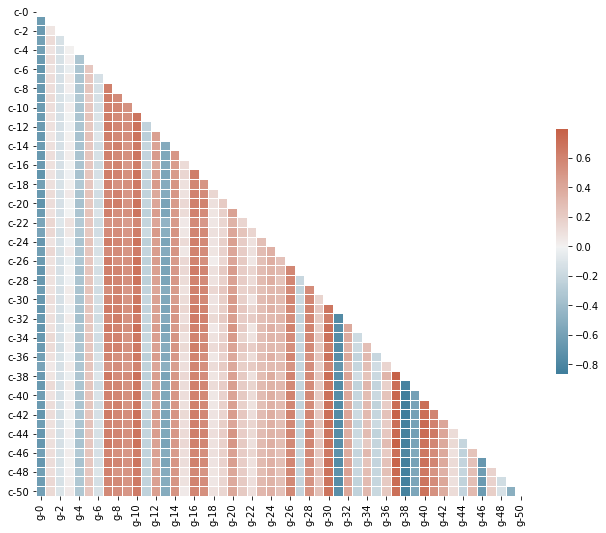

In [119]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(g_c_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(g_c_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.01, cbar_kws={"shrink": .5})

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)



In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

sns.heatmap(g_c_corr, #Incluido o DataFrame
            mask=mask, #Utiliza o mask para apresentar somente a metade(triangulo) da figura
            cmap=cmap, #Alterar a paleta de corres
            center=0, #centralização dos dados
            square=True, 
            linewidths=.01, #Tamanho das linhas entre as celulas
            cbar_kws={"shrink": .5} #ajustes de cores
            )

###Desafio 07: Resumo do que você aprendeu com os dados

 - Aprendemos a usar diferentes formas de 
cruzamento de tabelas
- A realizar plotagens no scatterplot e lmplot
- A realizar correlações e a interpreta-las tantos como dados, quantoe em figuaras como as criadas com ajuda do heatmap